## Business problem statement

Dream Housing Finance company deals in all home loans.They have presence across all urban,semi urban and rural areas.Customer first applyfor home loan, after that comapany validates the customer eligibility for loan.Company wants to automate the loaneligibility
process(real time) based on customer details provided while filing online application form.These details are Gender,Marital 
Status,Education,Number of Dependents,Income,Loan Amount,credit history and others.To automate this process, they have given a 
problem to identify the customer segments, those are eligible for loan amount so that they can specifically target these customers.

## Machine Learning problem formulation:

Loan Business is the main earning busienss of every bank.Loan prediction is the real-life problem faced by every banks.If done correctly,first it can mitigate risk to a particular extent and also save a lot of human hours for a particular bank.

It is a classification problem where we have to predit whether a loan would be approved of not.

### Hypothesis Generation:

Below are some of the factors which most probably affect the Loan Approval(Target varaible for this loan prediction problem)

Salary:Applicant with high income should have more chances of the loan approval
Previos History: Applicants who have have repayed their previos loans regulary have higher chances of the loan approval.
Loan amount: Loan approval also depends on the loan amount requested.If the loan amount is less,probability of the approval is high.
Loan Term:If the loan amount and tenure is less, then there is hign chances of approval
EMI: Generally EMI depends on the loan amount and tenure of the loan.If loan amount and tenure(months) is less,ultimately EMI will be less and higher chances of loan approval.
Data: Threre are two files(CSV files):

Train file:Train file will be used for training the model. It contains all the features and the target variable

Test File: It contains all the features, but target varaible is not there.This data is used for predicting the class with the help of trained model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold as sfkcv
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#### Reading Note

In [2]:
loan_train = pd.read_csv("loan_train.csv")
loan_test = pd.read_csv("loan_test.csv")

In [3]:
# Making a copy of the original data set

loan_train_orig = loan_train.copy()
loan_test_orig = loan_test.copy()

#### Exploratory Data Analysis

In [4]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### There are 12 features(independent varaible) and 1 target variable i.e Loan_Status in the train dataset

In [5]:
loan_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
# data types for each features

loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# shape of the data

loan_train.shape, loan_test.shape

((614, 13), (367, 12))

#### There are 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in the test dataset.

#### Univariate Analysis

In [8]:
#Target Varaible:
    
loan_train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
# With normalize view(to get the propotions)
loan_train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [46]:
colors = ['seagreen','firebrick']

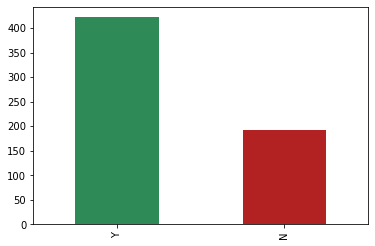

In [47]:
loan_train["Loan_Status"].value_counts().plot.bar(color=colors)

In [19]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


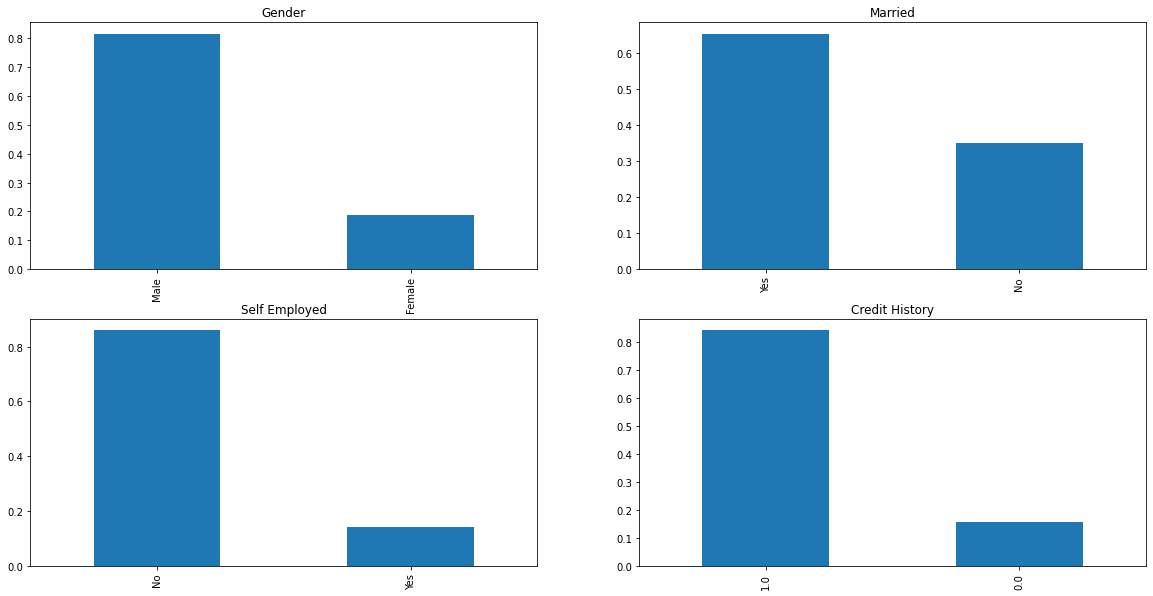

In [22]:
#plotting independent varaibles(categorical):

plt.figure(1) ;plt.subplot(221); loan_train["Gender"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Gender")
plt.subplot(222);loan_train["Married"].value_counts(normalize=True).plot.bar(title="Married")
plt.subplot(223);loan_train["Self_Employed"].value_counts(normalize=True).plot.bar(title="Self Employed")
plt.subplot(224);loan_train["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit History")

Observations:

Out of total number of applicants 80% are male.  <br>
There are around 65% of applicants are married. <br>
There are around 15% of applicants are self employed. <br>
85% of the applicant have good credit history(They have paid previos loans regulary). <br>

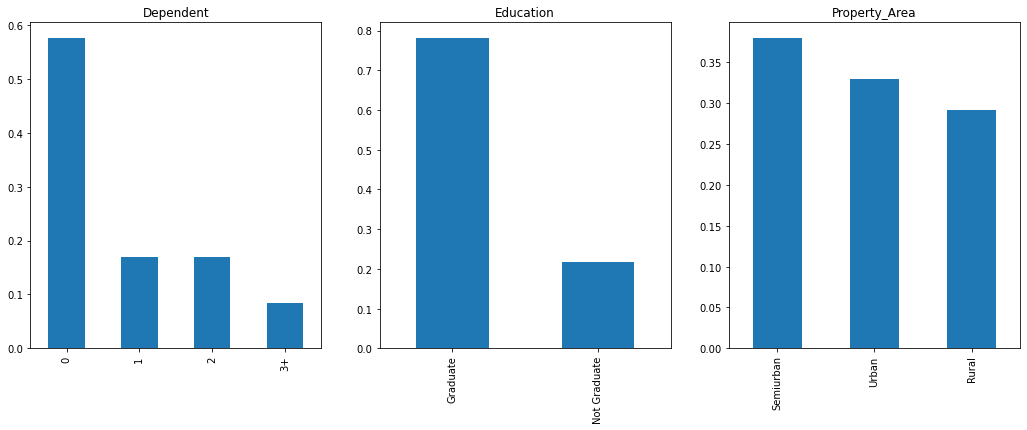

In [21]:
# Plotting ordinal independent variables:

plt.figure(1)
plt.subplot(141);loan_train.Dependents.value_counts(normalize=True).plot.bar(figsize=(24,6),title="Dependent")
plt.subplot(142);loan_train.Education.value_counts(normalize=True).plot.bar(title="Education")
plt.subplot(143);loan_train.Property_Area.value_counts(normalize=True).plot.bar(title="Property_Area")

Observations: <br>

* Maximum of the applicants do not have any dependent. <br>
* Out of total applicants, around 80% are graduates <br>
* Most of the applicants belongs to semiurban area

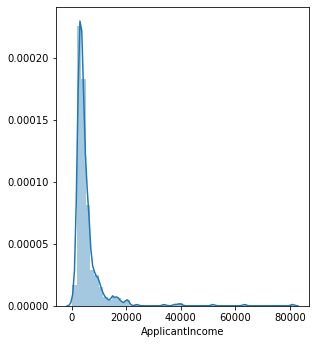

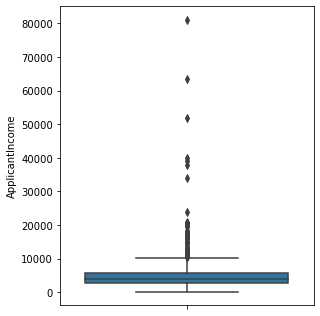

In [130]:
# plotting Numerical features

plt.figure(2);plt.subplot(121); sns.distplot(loan_train.ApplicantIncome)
fig= plt.gcf()
fig.set_size_inches(10, 5.5)
plt.figure(figsize=(3, 3))

plt.subplot(122);sns.boxplot(loan_train.ApplicantIncome,orient='v')
fig= plt.gcf()
fig.set_size_inches(10, 5.5)

Observations: <br>

The distribution of the applicant income is not normal distribution and is postive skewed. <br>
We will perform column standardization in order to make it a normal distribution. <br>
Box plot is indication the presence of a lot of outliers/extreme values.It may be because of the different education level.

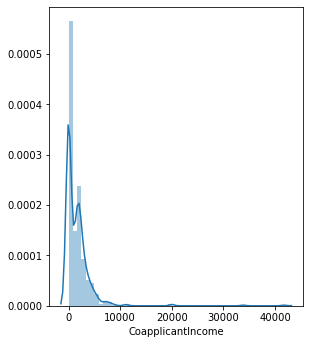

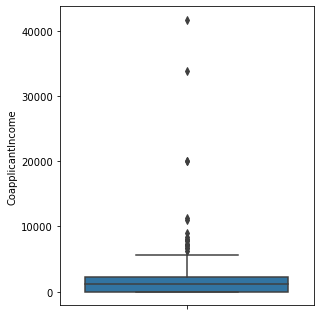

In [131]:
# Co applicant income distribution

plt.figure(1);plt.subplot(121);sns.distplot(loan_train.CoapplicantIncome)
fig= plt.gcf()
fig.set_size_inches(10, 5.5)
plt.figure(figsize=(3, 3))
plt.subplot(122);sns.boxplot(loan_train.CoapplicantIncome,orient='v')
fig= plt.gcf()
fig.set_size_inches(10, 5.5)

Observation: <br>

The distribution of the coapplicant income is also not normal and positive skewed. <br>
There are outliers in the income.

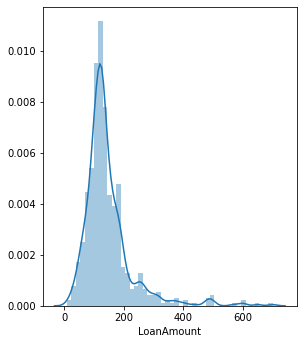

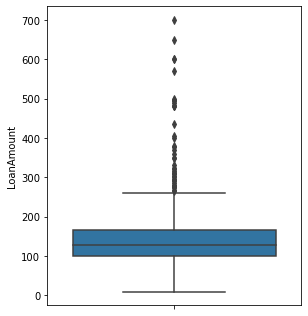

In [132]:
# visualizing the loan amount distribution

plt.figure(1);plt.subplot(121);sns.distplot(loan_train.LoanAmount)
fig= plt.gcf()
fig.set_size_inches(10, 5.5)
plt.figure(figsize=(3, 3))
plt.subplot(122);sns.boxplot(loan_train.LoanAmount,orient='v')
fig= plt.gcf()
fig.set_size_inches(10, 5.5)

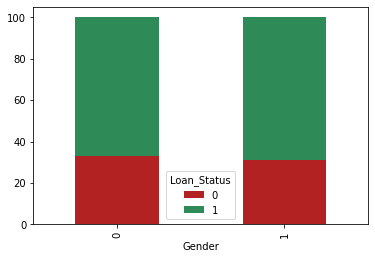

In [139]:
colors = ['firebrick','seagreen']
gen = pd.crosstab(loan_train.Gender,loan_train.Loan_Status).apply(lambda x:x/x.sum() *100,axis=1 )
gen.plot.bar(stacked=True, color=colors)

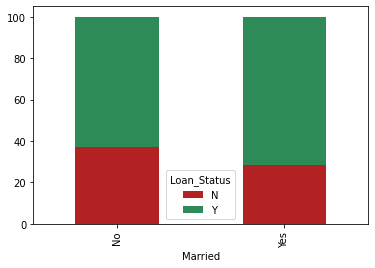

In [51]:
marr = pd.crosstab(loan_train.Married,loan_train.Loan_Status).apply(lambda x:x/x.sum() *100,axis=1 )
marr.plot.bar(stacked=True, color=colors)

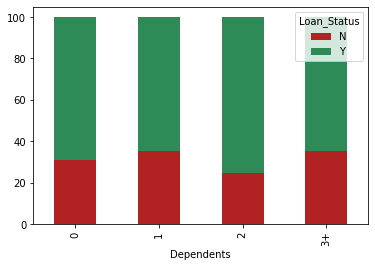

In [52]:
dep = pd.crosstab(loan_train.Dependents,loan_train.Loan_Status).apply(lambda x:x/x.sum() *100,axis=1 )
dep.plot.bar(stacked=True, color=colors)

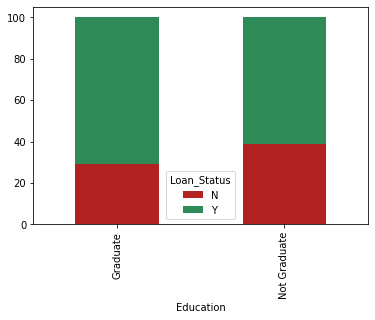

In [53]:
edu = pd.crosstab(loan_train.Education,loan_train.Loan_Status).apply(lambda x:x/x.sum() *100,axis=1 )
edu.plot.bar(stacked=True, color=colors)

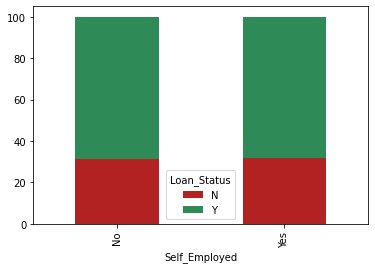

In [56]:
se = pd.crosstab(loan_train.Self_Employed,loan_train.Loan_Status).apply(lambda x:x/x.sum() *100,axis=1 )
se.plot.bar(stacked=True,color=colors)

Observations:
    
* Loan was approved for the majority of applicant who were married. <br>
* Applicants having dependent 1 and 3+ falls in the same categories with respect to Loan status. <br>

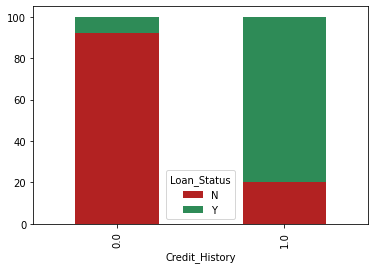

In [57]:
# For credit History and Property areas 

credit_his = pd.crosstab(loan_train.Credit_History,loan_train.Loan_Status).apply(lambda x:x/x.sum() *100,axis=1 )
credit_his.plot.bar(stacked=True,color=colors)

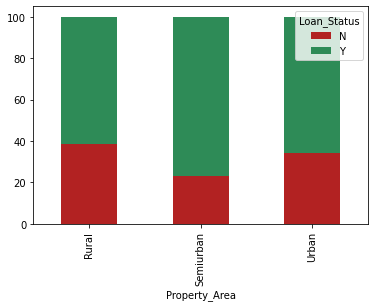

In [59]:
prop_area = pd.crosstab(loan_train.Property_Area,loan_train.Loan_Status).apply(lambda x:x/x.sum() *100,axis=1 )
prop_area.plot.bar(stacked=True,color=colors)

Observations:
    
* People with good credit history(1) are having more changes of loan approval #  Hypothesis holds true
* Loans associated with semiurban areas having major proportion in the approved category.

Numerical Feature and target variables:

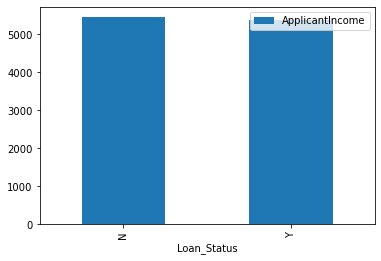

In [60]:
loan_train.groupby("Loan_Status").agg({"ApplicantIncome":'mean'}).plot.bar()

From the above we say that mean income is coming same for the both categories.

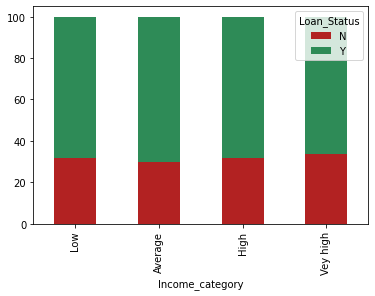

In [62]:
# Categorising Applicants income into different labels based on the values.

bins = [0,2500,4000,6000,np.inf]
labels = ["Low","Average","High","Vey high"]
loan_train["Income_category"]= pd.cut(loan_train.ApplicantIncome,bins=bins,labels=labels)
income_category = pd.crosstab(loan_train.Income_category,loan_train.Loan_Status).apply(lambda x:x/x.sum() *100,axis=1 )
income_category.plot.bar(stacked=True,color=colors)

From the above, it can be inferred that applicant income does not affect the possibilty of the loan approval, which is 
contradicting our hypothesis that high income results in high chances of loan approval.

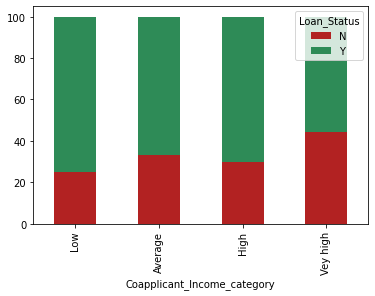

In [63]:
# Analysis of the coapplicant income.

bins = [0,2500,4000,6000,np.inf]
labels = ["Low","Average","High","Vey high"]
loan_train["Coapplicant_Income_category"]= pd.cut(loan_train.CoapplicantIncome,bins=bins,labels=labels)
coapplicant_income_category = pd.crosstab(loan_train.Coapplicant_Income_category,loan_train.Loan_Status).apply(lambda x:x/x.sum() *100,axis=1 )
coapplicant_income_category.plot.bar(stacked=True,color=colors)

From the above plot, it reflects that if the coapplicant income is less the chances of the laon approval is more. <br>
But in reality it does not look good. <br>
Here it may be possible because majority of the applicant does not have co-applicant and thus income is taken 0 and so the loan approval is not dependent on it.

So in order to get the clear picture let's combine applicant and coapplicant income and interpret the combine effect on 
loan approval.

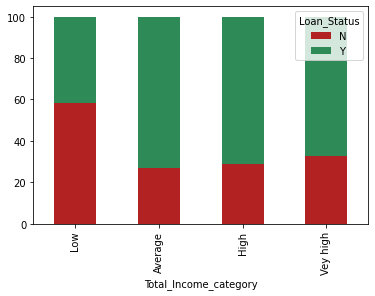

In [64]:
loan_train["total_income"]= loan_train.ApplicantIncome + loan_train.CoapplicantIncome

bins = [0,2500,4000,6000,np.inf]
labels = ["Low","Average","High","Vey high"]
loan_train["Total_Income_category"]= pd.cut(loan_train.total_income,bins=bins,labels=labels)
total_income_category = pd.crosstab(loan_train.Total_Income_category,loan_train.Loan_Status).apply(lambda x:x/x.sum() *100,axis=1 )
total_income_category.plot.bar(stacked=True,color=colors)

It is observed that in the low(Total income) category, proportion of the loan approval is less as compared to other three categories.

Analysis of the Loan amount feature:

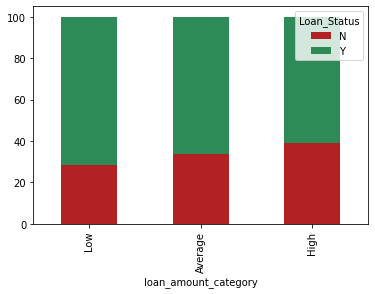

In [66]:
bins = [0,150,250,650]
labels = ["Low","Average","High"]
loan_train["loan_amount_category"]= pd.cut(loan_train.LoanAmount,bins=bins,labels=labels)
loan_amount_category = pd.crosstab(loan_train.loan_amount_category,loan_train.Loan_Status).apply(lambda x:x/x.sum() *100,axis=1 )
loan_amount_category.plot.bar(stacked=True,color=colors)

It is observed that for the low and average category with resepect the loan amount,proportion of the approved loans is higher
as compare to the high category.It is favouring our hypothesis that loan approval changes are high for the less loan amount.

In [67]:
# Droping the extra added columns:
loan_train = loan_train.drop(["Income_category","Coapplicant_Income_category","total_income","Total_Income_category",
                               "loan_amount_category"],axis=1)

In [68]:
loan_train.Dependents.replace('3+',3,inplace=True)# replacing "3+" with 3
loan_test.Dependents.replace('3+',3,inplace=True)
loan_train.Loan_Status.replace('N',0,inplace=True)
loan_train.Loan_Status.replace('Y',1,inplace=True)

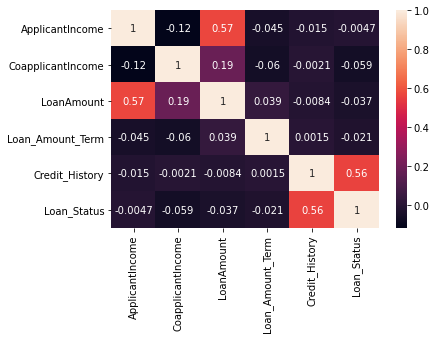

In [70]:
corr_matrix = loan_train.corr()
sns.heatmap(corr_matrix,annot =True)

Observation:
* Most correlated features are (Applicantincome-LoanAmount) and (Credit_History-Loan_Status)
* Loan_Amount is also correlated to the Coapplicant.

### Data Preprocessing

In [72]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Features like Gender,Married,Dependent,Self_Employed,Loan_Amount,Loan_Amount_Term and Credit_History are having missing values.

In [73]:
# Missing value imputation for categorical features
loan_train.Gender.fillna(loan_train.Gender.mode()[0],inplace=True)
loan_train.Married.fillna(loan_train.Married.mode()[0],inplace=True)
loan_train.Dependents.fillna(loan_train.Dependents.mode()[0],inplace=True)
loan_train.Self_Employed.fillna(loan_train.Self_Employed.mode()[0],inplace=True)
loan_train.Credit_History.fillna(loan_train.Credit_History.mode()[0],inplace=True)

In [78]:
# Since feature LoanAmount have most number of outliers,so mean will not be robust in this case.Therefore we will use median
#for the missing value imputation

loan_train.LoanAmount.fillna(loan_train.LoanAmount.median(),inplace = True)

In [79]:
loan_train.Loan_Amount_Term.fillna(loan_train.Loan_Amount_Term.mode()[0],inplace=True)

In [87]:
loan_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [81]:
# Missing value imputation for test dataset.

loan_test.Gender.fillna(loan_test.Gender.mode()[0],inplace=True)
loan_test.Dependents.fillna(loan_test.Dependents.mode()[0],inplace=True)
loan_test.Self_Employed.fillna(loan_test.Self_Employed.mode()[0],inplace=True)
loan_test.Credit_History.fillna(loan_test.Credit_History.mode()[0],inplace=True)

In [82]:
# for numerical features
loan_test.LoanAmount.fillna(loan_test.LoanAmount.median(),inplace = True)
loan_test.Loan_Amount_Term.fillna(loan_test.Loan_Amount_Term.mode()[0],inplace=True)

In [83]:
# making dummmy variables for the categorical features
loan_train=loan_train.drop("Loan_ID",axis=1)
loan_test = loan_test.drop("Loan_ID",axis=1)

#loan_train1= pd.get_dummies(loan_train)
#loan_test1=pd.get_dummies(loan_test)

In [84]:
# label encoding train data
le = LabelEncoder()
loan_train.Gender = le.fit_transform(loan_train.Gender)
loan_train.Married = le.fit_transform(loan_train.Married)
loan_train.Education = le.fit_transform(loan_train.Education)
loan_train.Self_Employed = le.fit_transform(loan_train.Self_Employed)
loan_train.Property_Area = le.fit_transform(loan_train.Property_Area)
loan_train.Dependents = loan_train.Dependents.astype(int) # changing datatype of the Dependent feature.

In [85]:
# Label Encoding test data
le = LabelEncoder()
loan_test.Gender = le.fit_transform(loan_test.Gender)
loan_test.Married = le.fit_transform(loan_test.Married)
loan_test.Education = le.fit_transform(loan_test.Education)
loan_test.Self_Employed = le.fit_transform(loan_test.Self_Employed)
loan_test.Property_Area = le.fit_transform(loan_test.Property_Area)
loan_test.Dependents = loan_test.Dependents.astype(int)

In [86]:
# removing the outliers for train dataset

z_score = abs(zscore(loan_train))
print(loan_train.shape)
loan_train_final = loan_train.loc[(z_score<3).all(axis=1)]
print(loan_train_final.shape)

(614, 12)
(577, 12)


In [88]:
# seperating features and target varaible

x = loan_train_final.iloc[:,0:-1]
y = loan_train_final.iloc[:,-1]

In [89]:
# scaling down using standardscaler
sc = StandardScaler()
x = sc.fit_transform(x) # train data 
loan_test_scaled = sc.fit_transform(loan_test)
x = pd.DataFrame(x)

In [90]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.3)

In [91]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [92]:
pred = model.predict(x_val)

In [93]:
accuracy_score(y_val,pred)

0.8793103448275862

Here accuracy is coming around 88%.It means 88% of the loan status is correctly identified.

In [94]:
pred_final = model.predict(loan_test_scaled)
test_loan_status = pd.DataFrame(pred_final)

In [96]:
# Taking varios models

knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()
lg = LogisticRegression()
dt = DecisionTreeClassifier()

In [97]:
# Stratified k-fold cross validation
best_model=[]
best_model_name=["KNeighborsClassifier","GaussianNB","LogisticRegression","DecisionTreeClassifier"]
count =0
for model in [knn,gnb,lg,dt]:
   
    accuracy = []
    exp=0
    skf = sfkcv(n_splits=5,random_state=None)
    print("\n")
    print("for:",best_model_name[count])
    for train_index,test_index in skf.split(x,y):
        exp+=1
         #print("Train Indexes",train_index,"Validation indexes",test_index)
        #print("Experiment no:",exp)
        #print("Lenght of Train Set:",len(train_index))
        #print("Lenth of Test set: ", len(test_index))
        X_train,X_test=x.iloc[train_index],x.iloc[test_index]
        Y_train,Y_test=y.iloc[train_index],y.iloc[test_index]
        #print(Y_train.value_counts())
        #print(Y_test.value_counts())
        model.fit(X_train,Y_train)
        Y_predict=model.predict(X_test)
        score = metrics.accuracy_score(Y_test,Y_predict)
        print("for k ={},accuracy is {}".format(exp,score))
        accuracy.append(score)
    #print(accuracy)
    print("Mean accuarcy score =",np.array(accuracy).mean())
    best_model.append(np.array(accuracy).mean())
    count=count+1
#print(best_model)
best_index = best_model.index(max(best_model))
print("\n")
print(best_model)
print("Model with highest accuracy: ",best_model_name[best_index])



for: KNeighborsClassifier
for k =1,accuracy is 0.7758620689655172
for k =2,accuracy is 0.7758620689655172
for k =3,accuracy is 0.782608695652174
for k =4,accuracy is 0.8434782608695652
for k =5,accuracy is 0.782608695652174
Mean accuarcy score = 0.7920839580209895


for: GaussianNB
for k =1,accuracy is 0.8103448275862069
for k =2,accuracy is 0.7931034482758621
for k =3,accuracy is 0.7913043478260869
for k =4,accuracy is 0.8260869565217391
for k =5,accuracy is 0.808695652173913
Mean accuarcy score = 0.8059070464767617


for: LogisticRegression
for k =1,accuracy is 0.8103448275862069
for k =2,accuracy is 0.7931034482758621
for k =3,accuracy is 0.7913043478260869
for k =4,accuracy is 0.8608695652173913
for k =5,accuracy is 0.8260869565217391
Mean accuarcy score = 0.8163418290854573


for: DecisionTreeClassifier
for k =1,accuracy is 0.7586206896551724
for k =2,accuracy is 0.6637931034482759
for k =3,accuracy is 0.6956521739130435
for k =4,accuracy is 0.7304347826086957
for k =5,accuracy 

Now doing the pediction for the test data with LogisticRegression using stratified k-folds cross validation.

In [98]:
accuracy = []
exp=0
skf = sfkcv(n_splits=5,random_state=None)
for train_index,test_index in skf.split(x,y):
    exp+=1
         
    X_train,X_test=x.iloc[train_index],x.iloc[test_index]
    Y_train,Y_test=y.iloc[train_index],y.iloc[test_index]
    #print(Y_train.value_counts())
    #print(Y_test.value_counts())
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    Y_predict=lg.predict(X_test)
    score = metrics.accuracy_score(Y_test,Y_predict)
    accuracy.append(score)
    pred_test = lr.predict(loan_test_scaled)
    #pred = lr.predict_proba(X_test)[:,1]
    test_loan_status1 = pd.DataFrame(pred_final)
print("Mean validation accuracy for the model:",np.mean(accuracy))

Mean validation accuracy for the model: 0.8163418290854573


In [99]:
# Now with the help of grid search we will do hyperparameter tunning for improving the accuracy.
# KNN Classifier Hyperparametr
weight_options = ['uniform', 'distance']
k_range = list(range(1,20,2))
grid_params = {'n_neighbors':k_range,
               'weights':weight_options,
                'metric':['euclidean','manhattan']
              }

GS =GridSearchCV(
     KNeighborsClassifier(),
     grid_params,
     verbose=1,
     cv =3,
     n_jobs =-1
     )
GS_results = GS.fit(x,y)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.6s finished


In [100]:
print("Optimal accuracy:",GS_results.best_score_)

Optimal accuracy: 0.811078727691422


In [101]:
GS_results.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [102]:
# Decision Tree Hyperparatmeter tunning
grid_params = {'max_depth':list(range(1,20,2)),
                'criterion':['gini','entropy']
              }

GS =GridSearchCV(
     DecisionTreeClassifier(),
     grid_params,
     verbose=1,
     cv =3,
     n_jobs =-1
     )
GS_results = GS.fit(x,y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished


In [103]:
print("Optimal accuracy:",GS_results.best_score_)

Optimal accuracy: 0.8180411629245826


In [104]:
GS_results.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [105]:
print("Optimal Parameter:",GS_results.best_params_)

Optimal Parameter: {'criterion': 'gini', 'max_depth': 1}


In [106]:
# Random Forest Classifier Hyperparatmeter tunning
max_depth =list(range(1,20,2))
n_estimators = [1,21,41,61,81,101,121,141,161,181]
grid_params = {'max_depth':max_depth,
               'n_estimators':n_estimators
              }

GS =GridSearchCV(
    RandomForestClassifier(),
     grid_params,
     verbose=1,
     cv =3,
     n_jobs =-1
     )
GS_results = GS.fit(x,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   11.0s finished


In [107]:
print("Optimal accuracy:",GS_results.best_score_)
print("Optimal Parameter:",GS_results.best_params_)

Optimal accuracy: 0.8180411629245826
Optimal Parameter: {'max_depth': 3, 'n_estimators': 21}


In [108]:
# making the prediction with decision tree('criterion': 'gini', 'max_depth': 1)

x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.3)
model = DecisionTreeClassifier(max_depth=1)
model.fit(x_train,y_train)
pred = model.predict(x_val)
print("Accuracy=",accuracy_score(y_val,pred))

#Now doing the pediction for the test data.

pred_final1 = model.predict(loan_test_scaled)
test_loan_status1 = pd.DataFrame(pred_final1)

Accuracy= 0.8390804597701149


In [109]:
# making the prediction with KNeighborsClassifier('metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform')

x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.3)
model = knn = KNeighborsClassifier(n_neighbors=9,metric='euclidean')
model.fit(x_train,y_train)
pred = model.predict(x_val)
print("Accuracy=",accuracy_score(y_val,pred))

#Now doing the pediction for the test data.

pred_final2 = model.predict(loan_test_scaled)
test_loan_status2 = pd.DataFrame(pred_final2)

Accuracy= 0.8103448275862069


In [110]:
# making the prediction with RandomForestClassifier('max_depth': 3, 'n_estimators': 61)

x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.3)
model = knn = RandomForestClassifier(max_depth=3,n_estimators=21)
model.fit(x_train,y_train)
pred = model.predict(x_val)
print("Accuracy=",accuracy_score(y_val,pred))

#Now doing the pediction for the test data.

pred_final3 = model.predict(loan_test_scaled)
test_loan_status3 = pd.DataFrame(pred_final2)

Accuracy= 0.8620689655172413


The best accuracy is achieved in random forest classifier